In [ ]:
%load_ext tensorboard

In [ ]:
#Importing Libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.utils import  array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
from keras.optimizers import Adam
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D,BatchNormalization
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer,MaxPool2D
from keras.callbacks import TensorBoard, ModelCheckpoint
import random
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!rm -rf ./logs/

In [ ]:
#Getting Images
count = 0
X = []
image_names = os.listdir('/content/drive/MyDrive/dataset/new_cleaned')[1000:2001]
for imagename in image_names:
    try:
        img_path = '/content/drive/MyDrive/dataset/new_cleaned/' + imagename
        img_array = img_to_array(load_img(img_path, target_size=(256, 256)))
        X.append(img_array)
        print(imagename)
        count += 1
    except Exception as e:
        print(f"Error processing {imagename}: {e}")
X = np.array(X, dtype=float)
print(count)

# Set up train and test data
split = int(0.90*len(X))
Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain

#set up Test data
Xtest = X[split:]
Xtest = 1.0/255*Xtest

296_3d13b3ea80fae98c004fdc286ab230f5.jpg
280_451b7c5cb8e3f0cad84110a952af7d35.jpg
299_cddeed8f08024f8ca454d29fd9a0106b.jpg
287_ad340737e22b16bac61d1904fb5f6ecb.jpg
304_84289b3b5f7543ef2e1d250f21c99d27.jpg
291_b7453ac47005eb492bbedd31cd2ee906.jpg
272_3c1c86f3d9a14aa3e492b160f92b2474.jpg
276_4cf1cd09725e7c79436ccf91f4db2e48.jpg
292_a67458fc14d5ad97b4cd114a39ead184.jpg
323_8268eaf14b8cb399d1106fd189d4edab.jpg
301_d9a21bc4e5b76f5e7b2b1a05300f0a9f.jpg
279_a179b4f2a9a49f23c1189bb64de016b8.jpg
290_6d3bad7ec0411720ff1bd8faaa513b40.jpg
277_e347775a88d5a922407bc352aaf0e389.jpg
298_6e7ddf838dc130839f20ee8cc71f6d55.jpg
300_488cc9fe4e540b5227ba7e11b64434e0.jpg
284_11eb7745a2a5cdacf7f30402dce6b2e7.jpg
282_016ea78c61420622caf3616af024d37c.jpg
IMG_0060.jpeg
294_4e42439662c26ecf3b6087b30e05fa9b.jpg
297_6b1da3f623bfcf1a856b36b9879b387d.jpg
257_a2dd3577936df5c158664e9f0db4bb1b.jpg
253_b9779038575d094f5bf79bbd8220b045.jpg
268_40fad0187f003fa282a332f1fbcd03cd.jpg
Error processing download.avif: cannot iden

In [ ]:
len(Xtrain)

900

In [ ]:
len(Xtest)

100

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, BatchNormalization, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * K.exp(-0.1)

# Define the model
model = Sequential()

model.add(Conv2D(input_shape=(256,256,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Upsampling layers
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))

# Replace the last convolutional layer with the modified one
model.add(Conv2D(2, kernel_size=(3, 3), padding='same', activation='tanh'))  # Use tanh activation for output layer with 2 filters

# Compile the model
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     1

In [ ]:
#vgg16
model = Sequential()

model.add(Conv2D(input_shape=(256,256,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Upsampling layers
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2, 2)))

# Replace the last convolutional layer with the modified one
model.add(Conv2D(2, kernel_size=(3, 3), padding='same', activation='tanh'))  # Use tanh activation for output layer with 2 filters

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

In [ ]:
len(Xtrain) // 200

4

In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

# Generate training data
# batch_size = 10
batch_size = 32
num_epochs = 120
steps_per_epoch =  28 #len(Xtrain) // batch_size

batch_size_val = 10  # Batch size for validation
epochs_val = 5  # Number of epochs for validation
steps_per_epoch_val = len(Xtest) // batch_size_val
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]  # Taking only the L channel as input
        Y_batch = lab_batch[:,:,:,1:] / 128  # Normalizing AB channels
        yield (X_batch.reshape(X_batch.shape + (1,)), Y_batch)

def val_image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtest, batch_size=batch_size_val):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]  # Taking only the L channel as input
        Y_batch = lab_batch[:,:,:,1:] / 128  # Normalizing AB channels
        yield (X_batch.reshape(X_batch.shape + (1,)), Y_batch)
# # Train model
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch = '500,520')
trainedmodel = model.fit(image_a_b_gen(batch_size), validation_data=val_image_a_b_gen(batch_size),callbacks=[tensorboard_callback], epochs=num_epochs, steps_per_epoch=steps_per_epoch,validation_steps=steps_per_epoch_val)


Epoch 1/120
28/28 [==============================] - 92s 2s/step - loss: 0.0459 - accuracy: 0.5383 - val_loss: 0.0180 - val_accuracy: 0.5301
Epoch 2/120
28/28 [==============================] - 45s 1s/step - loss: 0.0152 - accuracy: 0.5865 - val_loss: 0.0183 - val_accuracy: 0.5243
Epoch 3/120
28/28 [==============================] - 36s 1s/step - loss: 0.0152 - accuracy: 0.6058 - val_loss: 0.0181 - val_accuracy: 0.5295
Epoch 4/120
28/28 [==============================] - 35s 1s/step - loss: 0.0145 - accuracy: 0.6198 - val_loss: 0.0179 - val_accuracy: 0.5182
Epoch 5/120
28/28 [==============================] - 34s 1s/step - loss: 0.0142 - accuracy: 0.6198 - val_loss: 0.0174 - val_accuracy: 0.5074
Epoch 6/120
28/28 [==============================] - 34s 1s/step - loss: 0.0142 - accuracy: 0.6294 - val_loss: 0.0200 - val_accuracy: 0.5171
Epoch 7/120
28/28 [==============================] - 33s 1s/step - loss: 0.0141 - accuracy: 0.6292 - val_loss: 0.0177 - val_accuracy: 0.4820
Epoch 8/120
2

In [ ]:
%tensorboard --logdir logs/fit

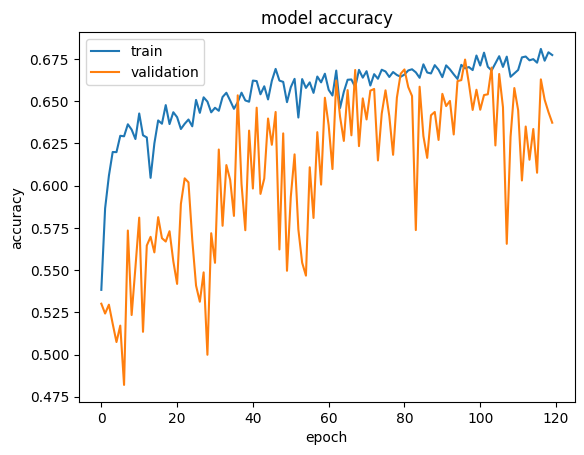

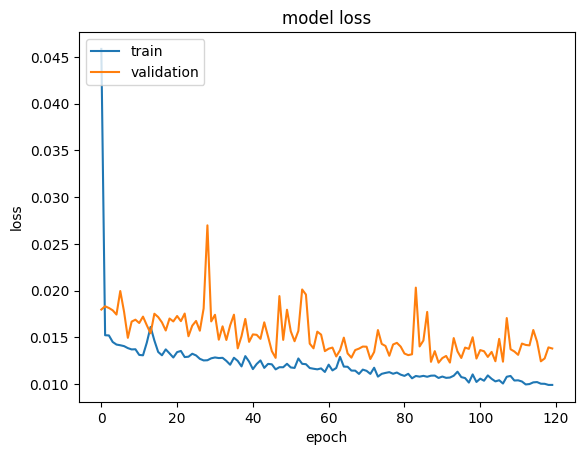

In [ ]:
# Summarize history for model accuracy
plt.plot(trainedmodel.history['accuracy'])
plt.plot(trainedmodel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for model loss
plt.plot(trainedmodel.history['loss'])
plt.plot(trainedmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_opt.json", "w") as json_file:
    json_file.write(model_json)
# model.save_weights("model.h5")
model.save_weights("model_opt.h5")

In [ ]:
# load json and create model

from keras.models import model_from_json
json_file = open('model_opt.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_opt.h5")

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     1

In [ ]:
# Test images
loaded_model.compile(optimizer='rmsprop', loss='mse', metrics = ['accuracy'])
Xtest = rgb2lab(1.0/255*X[split:])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:])[:,:,:,1:]
Ytest = Ytest / 128
print(loaded_model.evaluate(Xtest, Ytest, batch_size=10))

10/10 [==============================] - 2s 102ms/step - loss: 0.0140 - accuracy: 0.6329
[0.013956512324512005, 0.6329098343849182]


In [ ]:
len(os.listdir('/content/drive/MyDrive/dataset/test_set/'))

41

Output of the Model
2/2 [==============================] - 5s 5s/step


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return func(*args, **kwargs)


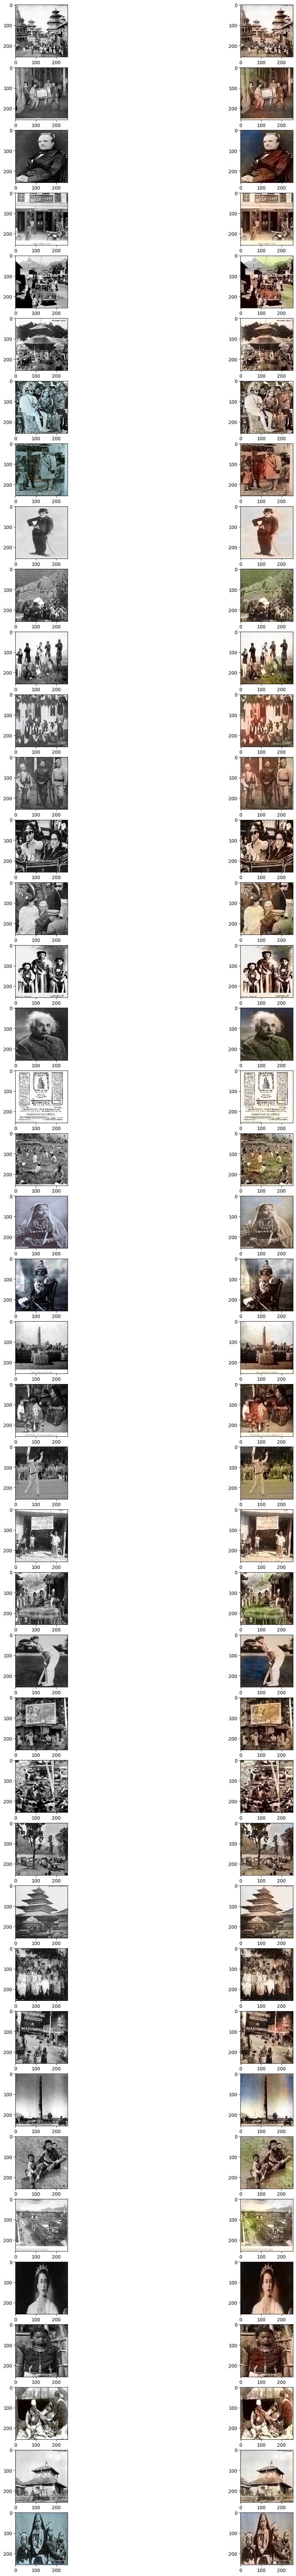

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(41, 2, figsize=(16, 100))
row = 0
colorize = []

print('Output of the Model')


for filename in os.listdir('/content/drive/MyDrive/dataset/test_set/'):
    img = cv2.imread('/content/drive/MyDrive/dataset/test_set/' + filename)

    # Check if image is read correctly
    if img is None:
        print(f"Couldn't read image {filename}. Skipping.")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (256, 256))
    colorize.append(img_resized)

    ax[row, 0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB), interpolation='nearest')
    row += 1

colorize = np.array(colorize, dtype=float)
colorize = rgb2lab(1.0/255 * colorize)[:, :, :, 0]
colorize = colorize.reshape(colorize.shape + (1,))


# Test model
# output = loaded_model.predict(colorize)
output = loaded_model.predict(colorize)
output *= 128

row = 0

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:, :, 0] = colorize[i][:, :, 0]
    cur[:, :, 1:] = output[i]
    resImage = lab2rgb(cur)

    ax[row, 1].imshow(resImage, interpolation='nearest')
    row += 1

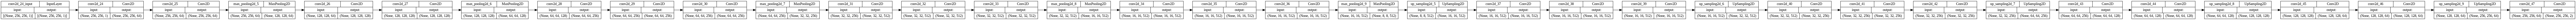

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir="LR")